#0. Prerequisites

In [1]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
!git clone https://github.com/KLUE-benchmark/KLUE.git
!pip install transformers

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (125/125), 1.12 MiB | 5.80 MiB/s, done.
Resolving deltas: 100% (55/55), done.
--2021-08-12 19:01:36--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 13.225.114.124, 13.225.114.57, 13.225.114.22, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|13.225.114.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  11.7MB/s    in 51s     

2021-08-12 19:02:29 (7.15 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]

Cloning into 'KLUE'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (131/131), done.
remo

In [2]:
from pprint import pprint
import torch
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

model_name = "skt/kogpt2-base-v2"
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


# 1. NumPy

In [3]:
##
1 + 3

##
a = [1,2,3]
b = [10,20,30]

##
a + b

##
c = []
for a1, b1 in zip(a,b):
    print(a1,b1)
    c.append(a1 + b1)

##
[a1 + b1 for a1, b1 in zip(a,b)]

1 10
2 20
3 30


[11, 22, 33]

In [4]:
import numpy as np
a = np.array(a)
b = np.array(b)
c = a + b
c

array([11, 22, 33])

In [5]:
a*b
np.argsort([3,4,1,2,39])
r = np.random.rand(3,3)
r@a

array([4.45912557, 1.9284196 , 2.6642978 ])

#2. Matplotlib

In [6]:
import matplotlib.pylab as plt

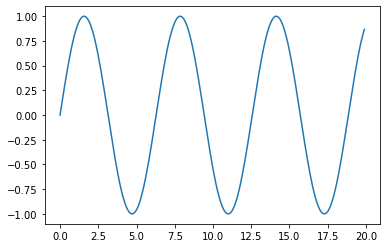

In [7]:
x = plt.arange(0,20, 0.1)
y = plt.sin(x)
plt.plot(x,y)

# 3. Scikit-learn

In [8]:
import matplotlib.pylab as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## 3.1 Data

In [9]:
digits = datasets.load_digits()

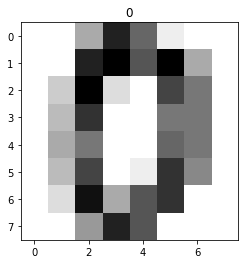

In [10]:
for i in range(1):
    img = digits.images[i]
    label = digits.target[i]
    plt.figure()
    plt.imshow(img, cmap=plt.cm.gray_r)
    plt.title(label)

In [11]:
n_samples = len(digits.images)

## 3.2. Learning (Model)

In [12]:
# Flatten images
print(digits.images.shape)
data = digits.images.reshape(n_samples, -1)
print(data.shape)

clf = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

clf.fit(X_train, y_train)

(1797, 8, 8)
(1797, 64)


SVC(gamma=0.001)

## 3.3 Test

In [13]:
predicted = clf.predict(X_test)

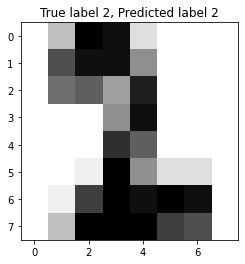

In [14]:
for img, gt_label, pr_label in zip(X_test[:1], y_test[:1], predicted[:1]):
    plt.figure()
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r)
    plt.title(f"True label {gt_label}, Predicted label {pr_label}")

## 3.4 Change Gamma, test set ratio

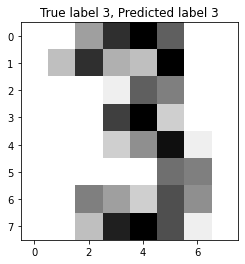

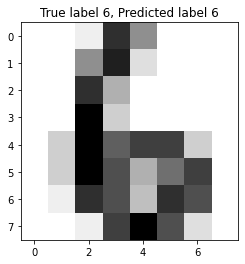

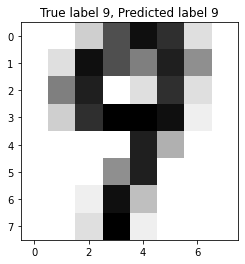

In [15]:
clf = svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.8, shuffle=False
)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
for img, gt_label, pr_label in zip(X_test[:3], y_test[:3], predicted[:3]):
    plt.figure()
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r)
    plt.title(f"True label {gt_label}, Predicted label {pr_label}")

## 3.5 t-sne

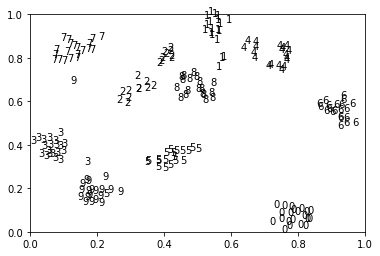

In [16]:
from sklearn import manifold
import numpy as np

X_train[0:2]

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_train)

a, b = X_tsne.T
a = (a - np.min(a)) / (np.max(a) - np.min(a))
b = (b - np.min(b)) / (np.max(b) - np.min(b))

plt.figure()
for a1, b1, label in zip(a[:200], b[:200], y_train):
#     print(a1, b1, label)
    plt.text(a1, b1, label)

# 4. PyTorch

## 4.1 Tensor calculation on "cpu" or "gpu"

In [17]:
x = [[1,2],[3,4]]
y = [[10,20],[30,40]]

##
x + y

##
xt = torch.tensor(x)
yt = torch.tensor(y)

xt+yt

##
xt@yt

##
xt*yt

##
torch.einsum('ij,jk->ik', xt,yt)

##
if torch.cuda.is_available():
    xtg = xt.to("cuda")

## 4.2 Automatic Differentiation

$ loss = |f(x) - y|^2 $

$ \frac{\partial loss}{\partial w} = 2 (f(x) - y) f'(x) = 2(f(x) -y ) x $

But, how about 

$ loss = | f(g(h(f(f(x))))) - y |^2$?

In [18]:
def f(w, b, x):
    return w*x + b

w = torch.tensor(1.3, requires_grad=True)
y = torch.tensor(2.0)
x = torch.tensor(1.0)
b = torch.tensor(3.0)

##
y_pr = f(w,b,x)
loss = (y_pr - y)**2
loss

## Manual calculatoin
2*(f(w,b,x) - y)*x

## Automatic differentiation
loss.backward()
w.grad

## 
y_pr = f(w,b,f(w,b,f(w,b,f(w,b,x))))
loss = (y_pr - y)**2
loss.backward()
w.grad

tensor(1355.9524)

## 4.3 Learning

In [19]:
import json
import torch

### 4.3.1 Data

In [20]:
path_train_data = './KLUE/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json'
path_dev_data = './KLUE/klue_benchmark/ynat-v1.1/ynat-v1.1_dev.json'

## 
with open(path_train_data, 'r') as f:
    data_t = json.load(f)
with open(path_dev_data, 'r') as f:
    data_d = json.load(f)

##
print(len(data_t), len(data_d))

##
data_t[0]

##
texts_t = [x["title"] for x in data_t]
labels_t = [x["label"] for x in data_t]
texts_d = [x["title"] for x in data_d]
labels_d = [x["label"] for x in data_d]

45678 9107


### 4.3.2 Characters -> Integers -> Vectors

In [21]:
label_types = list(set(labels_t))
n_labels = len(label_types)

## 
vocab = []
for text in texts_t:
    for char in text:
        if char not in vocab:
            vocab.append(char)

for text in texts_d:
    for char in text:
        if char not in vocab:
            vocab.append(char)

##
n_vocab = len(vocab)
n_vocab
vocab_dict = {char: i for i, char in enumerate(vocab)}
label_dict = {label: i for i, label in enumerate(label_types)}

##
vocab_emb = torch.nn.Embedding(n_vocab, 50)
layer1 = torch.nn.Linear(50, n_labels)

##
text = texts_t[0]
label = labels_t[0]

##
text_ids = [[vocab_dict[char] for char in text]]
label_id = [label_dict[label]]

##
text_ids_tensor = torch.tensor(text_ids)
label_id_tensor = torch.tensor(label_id)

##
text_tensor = vocab_emb(text_ids_tensor)

##
text_tensor_sum = text_tensor.sum(dim=1)
out = layer1(text_tensor_sum)

##
loss = torch.nn.CrossEntropyLoss()(out, label_id_tensor)

##
pr_label = label_types[out.argmax()]

### 4.3.3 Training

In [22]:
list_of_param = list(vocab_emb.parameters()) + list(layer1.parameters())
optim = torch.optim.Adam(list_of_param, lr=0.001)

##
for epoch in range(20):
    cnt = 0
    correct = 0
    for step, (text, label) in enumerate(zip(texts_t[:1000], labels_t[:1000])):
        
        text_ids = [[vocab_dict[char] for char in text]]
        label_id = [label_dict[label]]

        text_ids_tensor = torch.tensor(text_ids)
        label_id_tensor = torch.tensor(label_id)

        text_tensor = vocab_emb(text_ids_tensor)
        text_tensor_sum = text_tensor.sum(dim=1)
        out = layer1(text_tensor_sum)

        loss = torch.nn.CrossEntropyLoss()(out, label_id_tensor)
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        pr_label = label_types[out.argmax()]
        if pr_label == label:
            correct += 1
        cnt += 1
    if epoch % 10 == 0:
        print(f"Accuracy: {correct/cnt}")
        print(f"epoch: {epoch}, loss: {loss.item()}")
        print(f"text: {text}, label: {label}, prediction: {pr_label}")

Accuracy: 0.2
epoch: 0, loss: 3.2859394550323486
text: 유혹의 색 라즈베리 로즈 입은 LG V30, label: IT과학, prediction: 생활문화
Accuracy: 0.957
epoch: 10, loss: 0.004613826051354408
text: 유혹의 색 라즈베리 로즈 입은 LG V30, label: IT과학, prediction: IT과학


In [23]:
text = "오늘은 미세먼지가 심하겠습니다."
# text = "스마트폰의 시대가 온다"

text_ids = [[vocab_dict[char] for char in text]]
text_ids_tensor = torch.tensor(text_ids)
text_tensor = vocab_emb(text_ids_tensor)
text_tensor_sum = text_tensor.sum(dim=1)
out = layer1(text_tensor_sum)

pr_label = label_types[out.argmax()]
pr_label

'IT과학'

# 5. Text generation

In [24]:
model_name = "skt/kogpt2-base-v2"
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
tokenizer.tokenize("오늘도 날씨가 좋네요. 비가 주룩주룩 옵니다.")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


['▁오늘',
 '도',
 '▁날씨가',
 '▁좋',
 '네',
 '요.',
 '▁비가',
 '▁주',
 '룩',
 '주',
 '룩',
 '▁',
 '옵',
 '니다.']

In [25]:
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [26]:
text = "인공지능 연구자와 원숭이의 IQ 차이는"
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                         max_length=15,
                         repetition_penalty=2.0,
                         pad_token_id=tokenizer.pad_token_id,
                         eos_token_id=tokenizer.eos_token_id,
                         use_cache=True)
pprint(tokenizer.decode(gen_ids[0]))

'인공지능 연구자와 원숭이의 IQ 차이는 거의 없는 것으로 나타났다.\n연구'


# 6. Machine Reading Comprehension

In [27]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

##
question = "Who ate cheese?"
context = "According to the reliable historical literature, Fynmann likes fruits and Einstein likes a dairy product."

data_in = tokenizer(question,context)

##
input_ids_tensor = torch.tensor(data_in["input_ids"]).unsqueeze(0)
attention_mask_tensor = torch.tensor(data_in["attention_mask"]).unsqueeze(0)

##
out = model(input_ids_tensor)

##
out.keys()

##
st_idx = out["start_logits"].argmax(-1)
st_idx

##
ed_idx = out["end_logits"].argmax(-1)
ed_idx

##
tokenizer.decode(input_ids_tensor[0][st_idx:ed_idx+1])

' Einstein'

# 6. Face generation

## 6.1 Download StyleGan2 library and the trained model
## 6.2 Modify the code to run on cpus.

In [28]:
%cd stylegan2-ada-pytorch
!sed -n '82p' generate.py 
!sed -ie '82s/.*/    device = torch.device("cpu")/' generate.py
!sed -n '82p' generate.py

!sed -n '119p' generate.py
!sed -ie '119s/.*/        img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode, force_fp32=True)/' generate.py
!sed -n '119p' generate.py

/Users/wonseok/workspace/ai_lib/temp/stylegan2-ada-pytorch
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
    device = torch.device('cuda')
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly se

## 6.3 Import required libraries



In [29]:
import sys, os
from  pathlib import Path

project_dir = Path("/content/stylegan2-ada-pytorch")
sys.path.append(os.path.abspath(project_dir))

import torch
import numpy as np
import matplotlib.pylab as plt

import legacy

## 6.4. Generate artificial image



In [30]:
!sed -n '118p' generate.py
!sed -ie '118s/.*/        z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)\n/' generate.py
!sed -ie '119s/.*/        z += 0*torch.randn(1, G.z_dim).to(device)/' generate.py

!python generate.py --outdir=out --network ../ffhq.pkl --seeds=1

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
        z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the 

## 6.5 Plot the generated images

out/seed0001.png


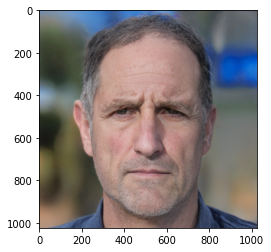

In [31]:
fnames = os.listdir('./out')
for fname in fnames:
  if fname.endswith('.png'):
    path_load = Path('./out') / fname 
    print(path_load)
    img = plt.imread(path_load)
    plt.figure()
    plt.imshow(img)